In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1DrzAzEGT70O45KKXulY6DwGdorkiAFfjb6MCnyNsnAg/edit").worksheet("Form Responses 1")

# Convert to pandas DataFrame
data = sheet.get_all_records()
df = pd.DataFrame(data)

df

,Timestamp,sessionID,segmentType,surfaceType,eventType,playerSpeed,headlightIntensityEntry,headlightRangeEntry,driftUsedEntry,Column 8
0,10/22/2025 16:10:26,6.389675e+17,30L,Normal,crash,124.07,,,,
1,10/23/2025 21:57:03,6.389685e+17,30L,Wet,crash,139.12,,,,
2,10/22/2025 14:21:02,6.389674e+17,30R,Normal,crash,97.37,,,,
3,10/23/2025 22:00:40,6.389685e+17,30R,Wet,crash,187.75,,,,
4,10/24/2025 11:39:56,6.389690e+17,30R,Normal,crash,83.84,,,,
...,...,...,...,...,...,...,...,...,...,...
1065,11/13/2025 21:29:21,6.389867e+17,Straight,Normal,crash,0.00,200,100,TRUE,
1066,11/13/2025 21:29:49,6.389867e+17,Straight,Normal,crash,169.21,430,215,FALSE,
1067,11/13/2025 21:37:26,6.389867e+17,Straight,Wet,crash,0.03,330,165,FALSE,
1068,11/13/2025 21:37:43,6.389867e+17,up,Normal,crash,150.67,330,165,FALSE,


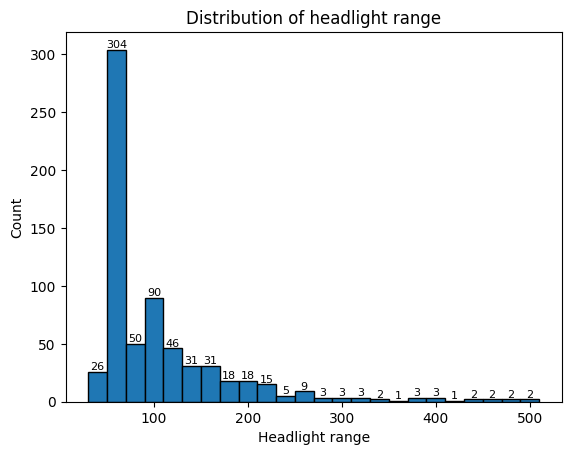

In [ ]:
# Crash Count: Using Drift vs Not Using Dirft

values = pd.to_numeric(df['headlightRangeEntry'], errors='coerce').dropna()

min_val = int(values.min())
max_val = int(values.max())

bin_width = 20
bins = np.arange(min_val - bin_width/2, max_val + bin_width/2, bin_width)

plt.figure()
n, bins, patches = plt.hist(values, bins=bins, edgecolor='black', linewidth=1)
plt.title('Distribution of headlight range')
plt.xlabel('Headlight range')
plt.ylabel('Count')

# numbers on top
for count, patch in zip(n, patches):
    if count == 0:
        continue
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y, int(count), ha='center', va='bottom', fontsize=8)

plt.show()